In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,date,timedelta
!pip install pingouin

     |████████████████████████████████| 206 kB 5.3 MB/s 
     |████████████████████████████████| 28.5 MB 49 kB/s 
     |████████████████████████████████| 9.5 MB 55.0 MB/s 
  Created wheel for pingouin: filename=pingouin-0.4.0-py3-none-any.whl size=206904 sha256=c4877fef758f2a5361df1136d4a93579f7b4d88c0ccd7d1252cca54380a9d639
  Stored in directory: /root/.cache/pip/wheels/8a/9d/c4/11677c2c4d5c0df9d1d4aa61528d868bb96e13b898e3f51c95
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=acc70122f8004f705f6c91cbe88490e6da224d3677066bf599071a7ffd19eac0
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmo

Load in dataframe

In [2]:
df = pd.read_csv("/content/RAWBOCA.csv")

In [5]:
df.head()

,UserID,gender,Participant,email,date,Memory,delayed,clock test,mental,attention,math,PFS,Orientation,score,age
0,b001,1.0,Fran,francesblo@gmail.com,5/9/20,2.0,5.0,4.0,3.0,2.0,4.0,4.0,3.0,27.0,69.0
1,b002,1.0,Cathy,ckarp@lacademy.edu,5/11/20,2.0,5.0,4.0,3.0,4.0,4.0,5.0,3.0,29.0,61.0
2,b003,1.0,Louise,ricewings@comcast.net,5/12/20,2.0,5.0,4.0,1.0,4.0,4.0,5.0,3.0,29.0,73.0
3,b004,1.0,Anne,annemacdowell@gmail.com,5/12/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,64.0
4,b005,2.0,Brett,brett.coon@gmail.com,5/13/20,2.0,5.0,4.0,3.0,4.0,4.0,5.0,3.0,30.0,53.0


In [6]:
df = df.rename(columns={'Unnamed: 0': 'UserID', 'Date of BoCA1': 'date'})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UserID       210 non-null    object 
 1   gender       209 non-null    float64
 2   Participant  208 non-null    object 
 3   email        130 non-null    object 
 4   date         140 non-null    object 
 5   Memory       189 non-null    float64
 6   delayed      189 non-null    float64
 7   clock test   189 non-null    float64
 8   mental       189 non-null    float64
 9   attention    189 non-null    float64
 10  math         189 non-null    float64
 11  PFS          189 non-null    float64
 12  Orientation  189 non-null    float64
 13  score        190 non-null    float64
 14  age          192 non-null    float64
dtypes: float64(11), object(4)
memory usage: 24.7+ KB


In [8]:
df.isna().sum()

UserID          0
gender          1
Participant     2
email          80
date           70
Memory         21
delayed        21
clock test     21
mental         21
attention      21
math           21
PFS            21
Orientation    21
score          20
age            18
dtype: int64

Subset columns that will be used:
UserID, memory, delayed, clock test, mental, attention, math, PFS, orientation, score

In [32]:
df_subset = df[["UserID", "Memory", "delayed", "clock test", "mental", "attention", "math", "PFS", "Orientation", "score", "age", "date"]]

In [33]:
df_subset.isna().sum()

UserID         0
Memory         0
delayed        0
clock test     0
mental         0
attention      0
math           0
PFS            0
Orientation    0
score          0
age            0
date           0
dtype: int64

In [34]:
df_subset.head()

,UserID,Memory,delayed,clock test,mental,attention,math,PFS,Orientation,score,age,date
0,b001,2.0,5.0,4.0,3.0,2.0,4.0,4.0,3.0,27.0,69.0,5/9/20
1,b002,2.0,5.0,4.0,3.0,4.0,4.0,5.0,3.0,29.0,61.0,5/11/20
2,b003,2.0,5.0,4.0,1.0,4.0,4.0,5.0,3.0,29.0,73.0,5/12/20
4,b005,2.0,5.0,4.0,3.0,4.0,4.0,5.0,3.0,30.0,53.0,5/13/20
5,b006,2.0,5.0,3.0,2.0,4.0,3.0,4.0,3.0,27.0,65.0,5/13/20


Convert date to time object
Pop dates and age

In [35]:
df_subset["date"] = pd.to_datetime(df_subset["date"], errors = 'coerce').dt.date

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:

date = df_subset.pop('date')
age = df_subset.pop('age')

describe

In [37]:
df_subset.describe()

,Memory,delayed,clock test,mental,attention,math,PFS,Orientation,score
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,1.292035,3.938053,3.265487,2.238938,3.194690,3.274336,4.362832,2.707965,24.336283
std,0.883190,1.422292,1.239367,1.037462,1.092657,1.127955,0.954893,0.763935,6.234424
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,3.000000,3.000000,2.000000,3.000000,3.000000,4.000000,3.000000,22.000000
50%,2.000000,4.000000,4.000000,3.000000,4.000000,4.000000,5.000000,3.000000,27.000000
75%,2.000000,5.000000,4.000000,3.000000,4.000000,4.000000,5.000000,3.000000,29.000000
max,2.000000,5.000000,4.000000,4.000000,4.000000,4.000000,5.000000,3.000000,30.000000


Transpose wide dataframe into long for ICC calculations

In [38]:
df2 = pd.melt(frame = df_subset,
        id_vars = ["UserID"],
        var_name = "subtest",
        value_name = "score")


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resultiing Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [39]:
df2.head()

,UserID,subtest,score
0,b001,Memory,2.0
1,b002,Memory,2.0
2,b003,Memory,2.0
3,b005,Memory,2.0
4,b006,Memory,2.0


In [40]:
import pingouin as pg
icc = pg.intraclass_corr(data = df2, targets = 'subtest', raters = 'UserID', ratings = 'score', nan_policy= 'omit')

In [41]:
icc.set_index('Type')

,Description,ICC,F,df1,df2,pval,CI95%
Type,,,,,,,
ICC1,Single raters absolute,0.905197,1079.947290,8,1008,0.0,"[0.81, 0.97]"
ICC2,Single random raters,0.905219,1491.385063,8,896,0.0,"[0.81, 0.97]"
ICC3,Single fixed raters,0.929524,1491.385063,8,896,0.0,"[0.86, 0.98]"
ICC1k,Average raters absolute,0.999074,1079.947290,8,1008,0.0,"[1.0, 1.0]"
ICC2k,Average random raters,0.999074,1491.385063,8,896,0.0,"[1.0, 1.0]"
ICC3k,Average fixed raters,0.999329,1491.385063,8,896,0.0,"[1.0, 1.0]"


Summary of intraclass correlation coefficients with their accompanying descriptions. 

In [42]:
import sklearn as sk
import pandas as pd
import numpy as np
import scipy as sp

In [44]:
import statsmodels.formula.api as sm
from sklearn.preprocessing import StandardScaler


In [45]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
#from sklearn.cross_validation import train_test_split
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

Principle Component Analysis

Identifying features and the target (total score - 'score')

In [47]:
df3 = df_subset.copy() #create a new dataframe 
df3 = df3.rename(columns={'clock test' : 'clock'}) #easier format 


Regression plot of each subscale against total score 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


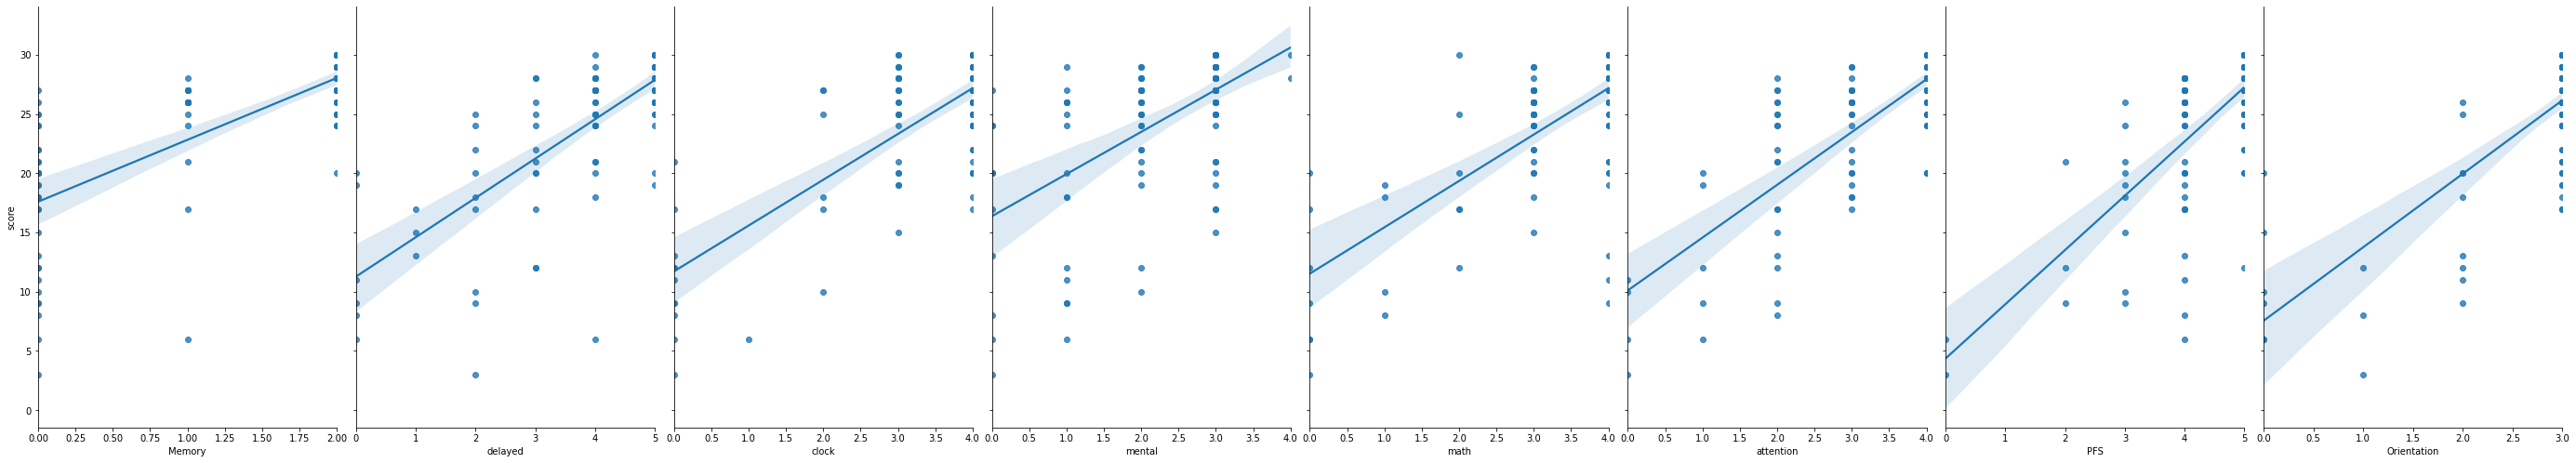

In [48]:
sns.pairplot(df3, x_vars=['Memory', 'delayed' ,'clock',	'mental',	'math', 'attention',	'PFS',	'Orientation'], y_vars='score', size=7, aspect=0.7, kind = 'reg')

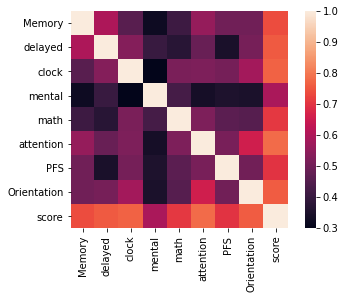

In [58]:
#correlation:

df_cor = df3[['Memory', 'delayed' ,'clock',	'mental',	'math', 'attention',	'PFS',	'Orientation', 'score']]

cor = df_cor.corr()
cor
sns.heatmap(cor, square = True) #Plotting correlation as heat map, lighter shade represents high correlation

In [50]:
feature_cols = ['Memory', 'delayed' ,'clock',	'mental',	'math', 'attention',	'PFS',	'Orientation'] #features
X = df3[feature_cols] 
y = df3.score #target


Standardize (normalizing each feature) and the total score

In [60]:
def normalize(feature):
  return (feature - feature.mean()) / feature.std()
cont_norm_x = normalize(X)

cont_norm_y = normalize(y)

Append the standardized score to the continuous standardized feature dataframe

In [52]:
#cont_norm_x['score'] = cont_norm_y
#df_norm = cont_norm_x.copy()

Linear Regression 

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state = 1)
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE

In [ ]:
#unstandardized dataframe is 'df3' where feature columns are 'X' and target is 'y'
#standardized dataframe is 'df_norm' where feature columns are 'cont_norm_x' and target is 'cont_norm_y'
#Test each continus variable as a standalone linear regression. (Unstandardized)
col_names = X.select_dtypes('float').columns
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("score~" + val)
    print ("------------------------------")

    f = 'score~' + val
    model = smf.ols(formula=f, data=df3).fit()
    X_new = pd.DataFrame({val: [X[val].min(), X[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

In [61]:
def lin_reg(X, y):  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    print(regressor.intercept_)
    print(regressor.coef_)
    df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print(df)
    from sklearn import metrics
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Unstandardized linear regression test/train set 

In [62]:
lin_reg(X, y)

0.015398544583373308
[1.07069885 1.00572533 0.97588206 1.00454512 0.91923463 1.01847693
 1.03211111 1.03442338]
     Actual  Predicted
106    27.0  27.008723
32     25.0  25.137165
92     22.0  22.016428
41     27.0  27.161070
17     30.0  30.117258
20     30.0  30.117258
133    28.0  28.080305
1      29.0  30.117258
30     30.0  30.117258
66     27.0  27.103540
116    25.0  25.094450
132    30.0  30.117258
97     20.0  19.978557
63     21.0  21.016019
10     29.0  29.141376
113    27.0  26.970135
70     17.0  17.404054
39     30.0  30.117258
103    24.0  23.994790
101    27.0  27.159769
68     26.0  26.155642
33     29.0  29.098781
69     26.0  25.136033
108    27.0  27.052201
117    28.0  28.105808
8      29.0  29.141376
125    30.0  30.117258
26     30.0  30.117258
24     30.0  30.117258
Mean Absolute Error: 0.16732818301812863
Mean Squared Error: 0.08462735484970935
Root Mean Squared Error: 0.29090781159967044


Standardized linear regression 

In [63]:
lin_reg(cont_norm_x, cont_norm_y)

0.004319301434026972
[0.15136247 0.22841494 0.19514263 0.15943044 0.15757288 0.17554588
 0.16612443 0.12755433]
       Actual  Predicted
66   0.427259   0.427146
34   0.748059   0.761714
123  0.908459   0.919168
101  0.427259   0.443664
43   0.587659   0.587743
74   0.266860   0.300741
19   0.748059   0.758571
5    0.427259   0.294371
93   0.427259   0.465137
89   0.908459   0.919168
9    0.587659   0.584600
187 -2.941135  -2.882597
189 -0.053940  -0.023642
116  0.106460   0.119799
26   0.908459   0.919168
75  -2.620335  -2.565736
113  0.427259   0.415808
114  0.587659   0.601055
132  0.908459   0.919168
104 -0.855938  -0.809766
80  -1.176738  -1.155574
41   0.427259   0.458151
64   0.106460   0.094616
25  -0.695539  -0.579291
83  -1.497537  -1.533305
47   0.587659   0.608041
186 -1.978737  -1.971549
70  -1.176738  -1.096643
99  -1.176738  -1.141092
Mean Absolute Error: 0.030287250837838148
Mean Squared Error: 0.0019210541308675485
Root Mean Squared Error: 0.0438298315176724


Feature selection for linear regression 

Unstandardized linear regression feature selection 

In [64]:
model = LinearRegression()
rfe_notstand = RFE(model, 3) #choosing top three features
fit_notstand = rfe_notstand.fit(X, y)
print("Num Features: %d" % fit_notstand.n_features_)
print("Selected Features: %s" % fit_notstand.support_)
print("Feature Ranking: %s" % fit_notstand.ranking_)

Num Features: 3
Selected Features: [ True False  True False False  True False False]
Feature Ranking: [1 5 1 2 6 1 4 3]


Standardized linear regression feature selection

In [65]:
rfe_stand = RFE(model, 3) #choosing top three features
fit_stand = rfe_stand.fit(X, y)
print("Num Features: %d" % fit_stand.n_features_)
print("Selected Features: %s" % fit_stand.support_)
print("Feature Ranking: %s" % fit_stand.ranking_)

Num Features: 3
Selected Features: [ True False  True False False  True False False]
Feature Ranking: [1 5 1 2 6 1 4 3]


Features that are correlated to the ranks given by the recursive feature selection algo are 'memory, clock, attention'

In [ ]:
features_subset = ['Memory', 'clock',	'attention']
df_features = cont_norm_x[features_subset] #taking the feature columns from the standardized dataframe
df_features['score'] = cont_norm_y
#appending standardized score to the standardized feature dataframe
df_norm = cont_norm_x.copy()
df_norm['score'] = cont_norm_y

#Comparing the models with 'lm1' that includes all of the features and 'lm3' that includes those that were selected from RFE
lm1 = smf.ols(formula='score ~ Memory + delayed + clock + mental + math + attention + PFS + Orientation', data= df_norm).fit()
lm3 = smf.ols(formula = 'score ~ Memory + clock + attention', data = df_features).fit()

#extract predicted values from the models
all_pred = lm1.predict(X)
feature_pred = lm3.predict(X_RFE)


print(lm1.mse_total)
print(lm3.mse_total)



Print MAE, MSE, RMSE from both models

In [71]:
lm1_fitted = lm1.fittedvalues
lm3_fitted = lm3.fittedvalues

print('Mean Absolute Error all:', metrics.mean_absolute_error(lm1_fitted , all_pred))
print('Mean Squared Error all:', metrics.mean_squared_error(lm1_fitted, all_pred))
print('Root Mean Squared Error all:', np.sqrt(metrics.mean_squared_error(lm1_fitted, all_pred)))


print('Mean Absolute Error 3:', metrics.mean_absolute_error(lm3_fitted,feature_pred))
print('Mean Squared Error 3:', metrics.mean_squared_error(lm3_fitted, feature_pred))
print('Root Mean Squared Error 3:', np.sqrt(metrics.mean_squared_error(lm3_fitted, feature_pred)))


Mean Absolute Error all: 4.2527401494298065
Mean Squared Error all: 18.10086040126291
Root Mean Squared Error all: 4.254510594799702
Mean Absolute Error 3: 0.0
Mean Squared Error 3: 0.0
Root Mean Squared Error 3: 0.0


In [72]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     2597.
Date:                Tue, 17 Aug 2021   Prob (F-statistic):          4.70e-116
Time:                        22:24:40   Log-Likelihood:                 139.73
No. Observations:                 113   AIC:                            -261.5
Df Residuals:                     104   BIC:                            -236.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.356e-16      0.007   3.42e-14      1.000      -0.014       0.014
Memory          0.1495      0.010     15.367      0.000       0.130       0.169
delayed         0.2309      0.010     23.738      0.000       0.212       0.250
clock           0.1978      0.010     20.254      0.000       0.178       0.217
mental          0.1622      0.008     19.986      0.000       0.146       0.178
math            0.1675      0.009     18.502      0.000       0.150       0.185
attention       0.1773      0.010     17.170      0.000       0.157       0.198
PFS             0.1589      0.009     17.438      0.000       0.141       0.177
Orientation     0.1232      0.010     12.090      0.000       0.103       0.143
==============================================================================
Omnibus:                      174.181   Durbin-Watson:                   2.154
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11395.002
Skew:                           5.845   Prob(JB):                         0.00
Kurtosis:                      50.786   Cond. No.                         3.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     228.2
Date:                Tue, 17 Aug 2021   Prob (F-statistic):           8.00e-47
Time:                        22:25:33   Log-Likelihood:                -47.671
No. Observations:                 113   AIC:                             103.3
Df Residuals:                     109   BIC:                             114.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.356e-16      0.035   6.67e-15      1.000      -0.070       0.070
Memory         0.3385      0.044      7.675      0.000       0.251       0.426
clock          0.4187      0.043      9.778      0.000       0.334       0.504
attention      0.3724      0.046      8.107      0.000       0.281       0.463
==============================================================================
Omnibus:                        9.207   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.549
Skew:                          -0.559   Prob(JB):                      0.00844
Kurtosis:                       3.881   Cond. No.                         2.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state = 1)
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

Principle Component Analysis

In [76]:
pca = PCA(n_components=3)
fit = pca.fit_transform(cont_norm_x)
# summarize components
#print("Explained Variance: %s" % fit.explained_variance_ratio_)
#print(fit.components_)
#fit.n_components_
pca_components = pd.DataFrame(pca.components_,columns=X.columns,index = ['PC-1','PC-2', 'PC-3'])

In [77]:
pd.set_option('display.max_columns', None)
print(pca_components)

        Memory   delayed     clock    mental      math  attention       PFS  \
PC-1 -0.362620 -0.351677 -0.369510 -0.274440 -0.342693  -0.386418 -0.346163   
PC-2  0.209328  0.061166  0.198716 -0.856489 -0.302017   0.198012  0.019874   
PC-3  0.369706  0.657847 -0.139608  0.193494 -0.417322  -0.125568 -0.421640   

      Orientation  
PC-1    -0.382607  
PC-2     0.220366  
PC-3    -0.076938  


Another classifer algo

In [78]:
#from sklearn.ensemble import ExtraTreesClassifier
#model = ExtraTreesClassifier(n_estimators=3)
#model_fit = model.fit(cont_norm_x, cont_norm_y)
#print(model.feature_importances_)


ValueError: ignored